# 1. Importing the required libraries

For the first Laboratory exercise of the subject Machine Learning, I chose to follow the advice of the instructions, which is why here I am going to work with the first dataset.

In [1]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import numpy as np #Library for numerical calculations
import pandas as pd #Library for data analysis and reading data from files
from scipy import stats #library for statistical analysis
from sklearn import datasets #libraries for machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# 2. Loading the Heart Dataset 

In [2]:
dt = pd.read_csv('heart.csv')
feature_names = np.loadtxt(open('heart.csv', "rb"), delimiter = ",", max_rows = 1, dtype = str)
data = np.loadtxt(open('heart.csv', "rb"), delimiter = ',', skiprows=1, dtype=str)
X = data[:, :-1].astype(np.float)
y = data[:, -1].astype(np.int)
colors = ['red', 'lightred']
target_names = [0, 1]

### 2.1 Describing the data from the Heart Dataset

In [3]:
dt.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#heart.describe()
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 2.2 Meaning of the column headers

1. __age__: The person's age in years

2. __sex__: The person's sex (1 = male, 0 = female)

3. __cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. __trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital)

5. __chol__: The person's cholesterol measurement in mg/dl

6. __fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. __restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. __thalach__: The person's maximum heart rate achieved

9. __exang__: Exercise induced angina (1 = yes; 0 = no)

10. __oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11. __slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. __ca__: The number of major vessels (0-3)

13. __thal__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. __target__: Heart disease (0 = no, 1 = yes)

# 3. Visualization

We start with visualizng the histogram of each feature and the scatterplots of each feature pair.


### 3.1 Histograms

###### Age distribution

Text(0.5, 1.0, 'Distribution of age')

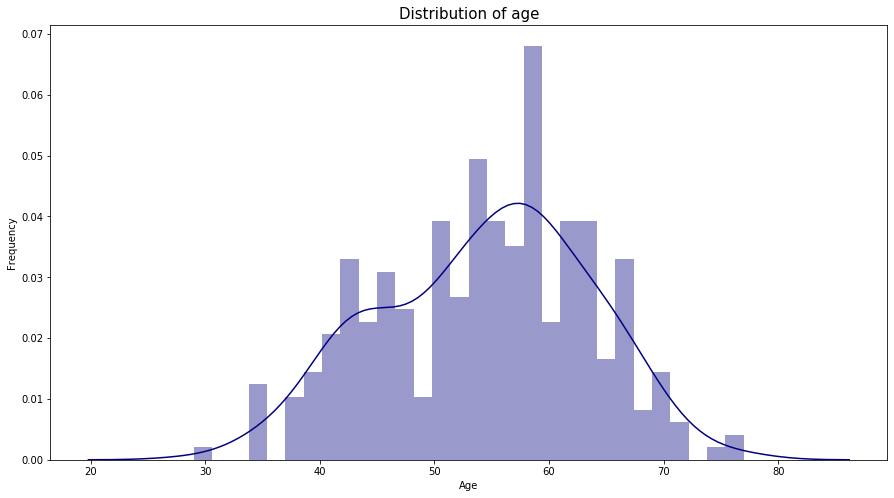

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(dt['age'], hist=True, bins=30, color='navy')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=15)

###### Gender Count 

Text(0.5, 1.0, 'Gender')

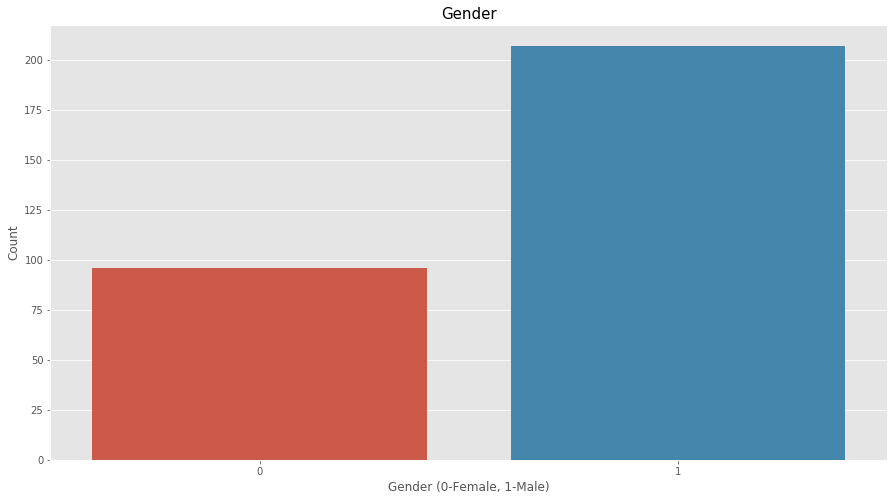

In [61]:
plt.figure(figsize=(15, 8))
sns.countplot(dt['sex'])
plt.xlabel('Gender (0-Female, 1-Male)')
plt.ylabel('Count')
plt.title('Gender', fontsize=15)

###### Gender Count at different ages

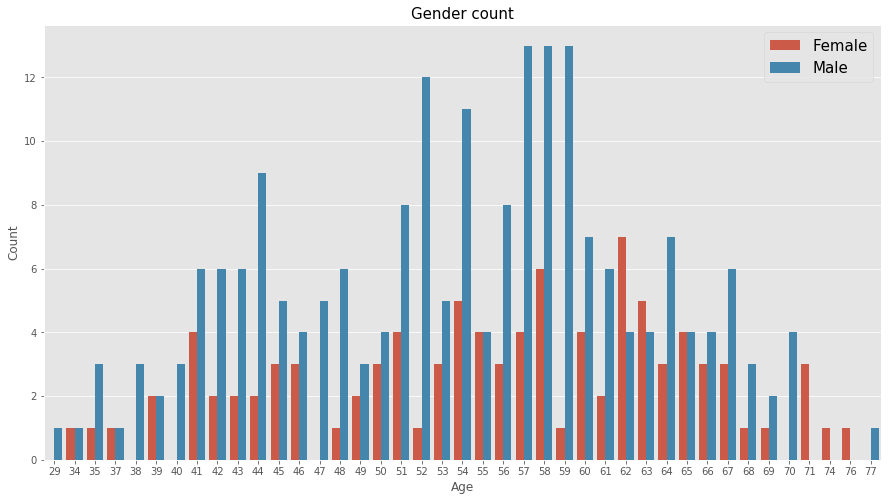

In [63]:
plt.figure(figsize=(15,8))
sns.countplot(dt['age'], hue=dt['sex'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['Female', 'Male'])

###### Target Count

Text(0.5, 1.0, 'Targer count')

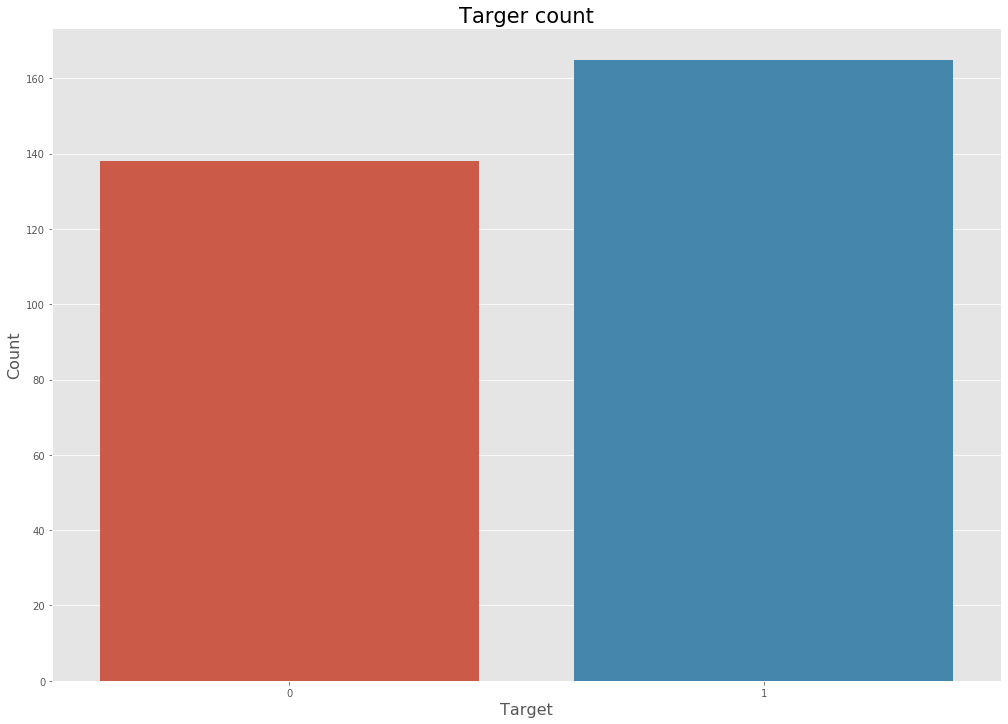

In [64]:
plt.figure(figsize=(17,12))
sns.countplot(dt['target'])
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Targer count', fontsize=21)

### 3.2 Heat  map

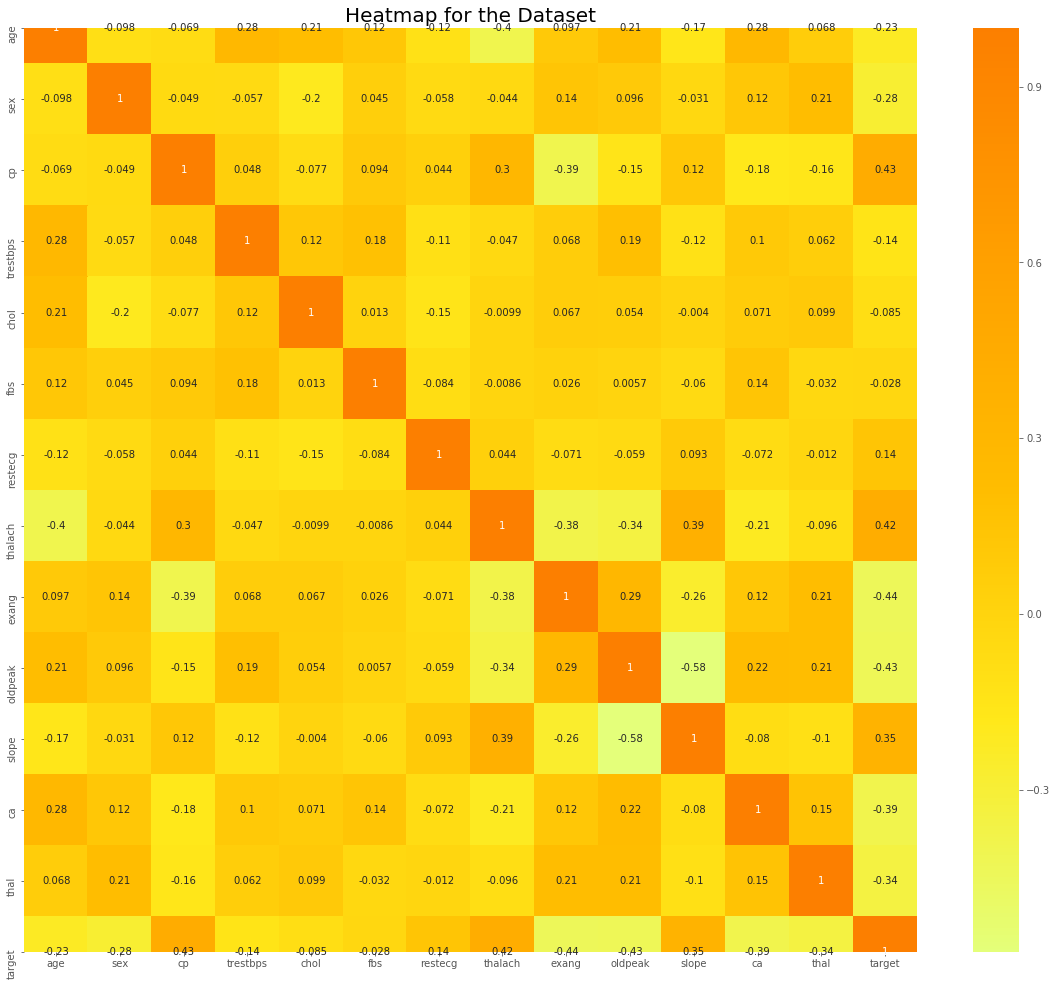

In [44]:
# making a heat map

plt.rcParams['figure.figsize'] = (20, 17)
plt.style.use('ggplot')
sns.heatmap(dt.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

### 3.2 Scatter plot

For the scatter plot I choose the features that I found most relevant after reading the information at https://www.kaggle.com/ronitf/heart-disease-uci where I downloaded the dataset from. Basically, it shows whether there is a disease or there is a lack of it.

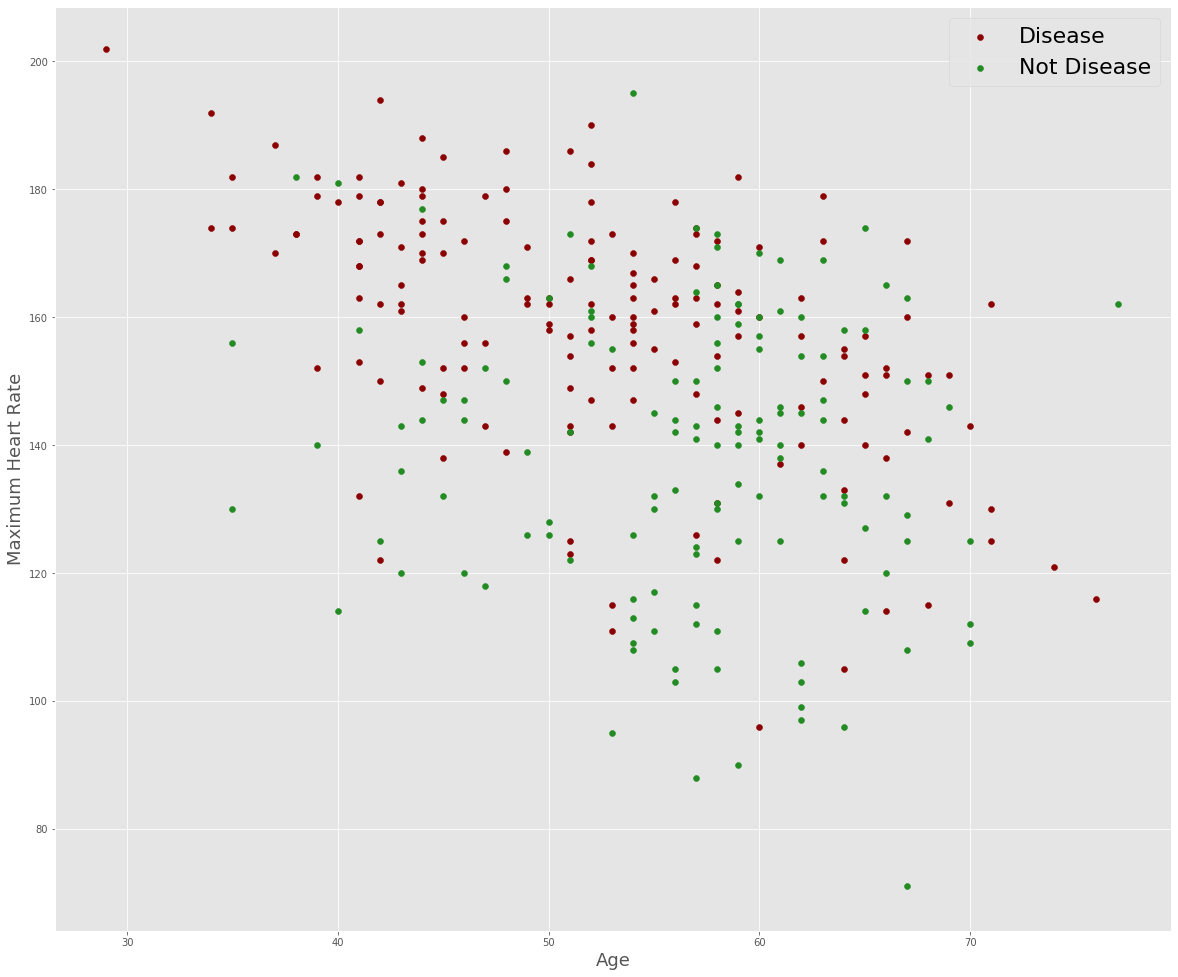

In [53]:
plt.scatter(x=dt.age[dt.target==1], y=dt.thalach[(dt.target==1)], c='darkred')
plt.scatter(x=dt.age[dt.target==0], y=dt.thalach[(dt.target==0)], c='forestgreen')
plt.legend(["Disease", "Not Disease"], fontsize=22)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Maximum Heart Rate", fontsize=18)
plt.show()

###### Pair plot for more features

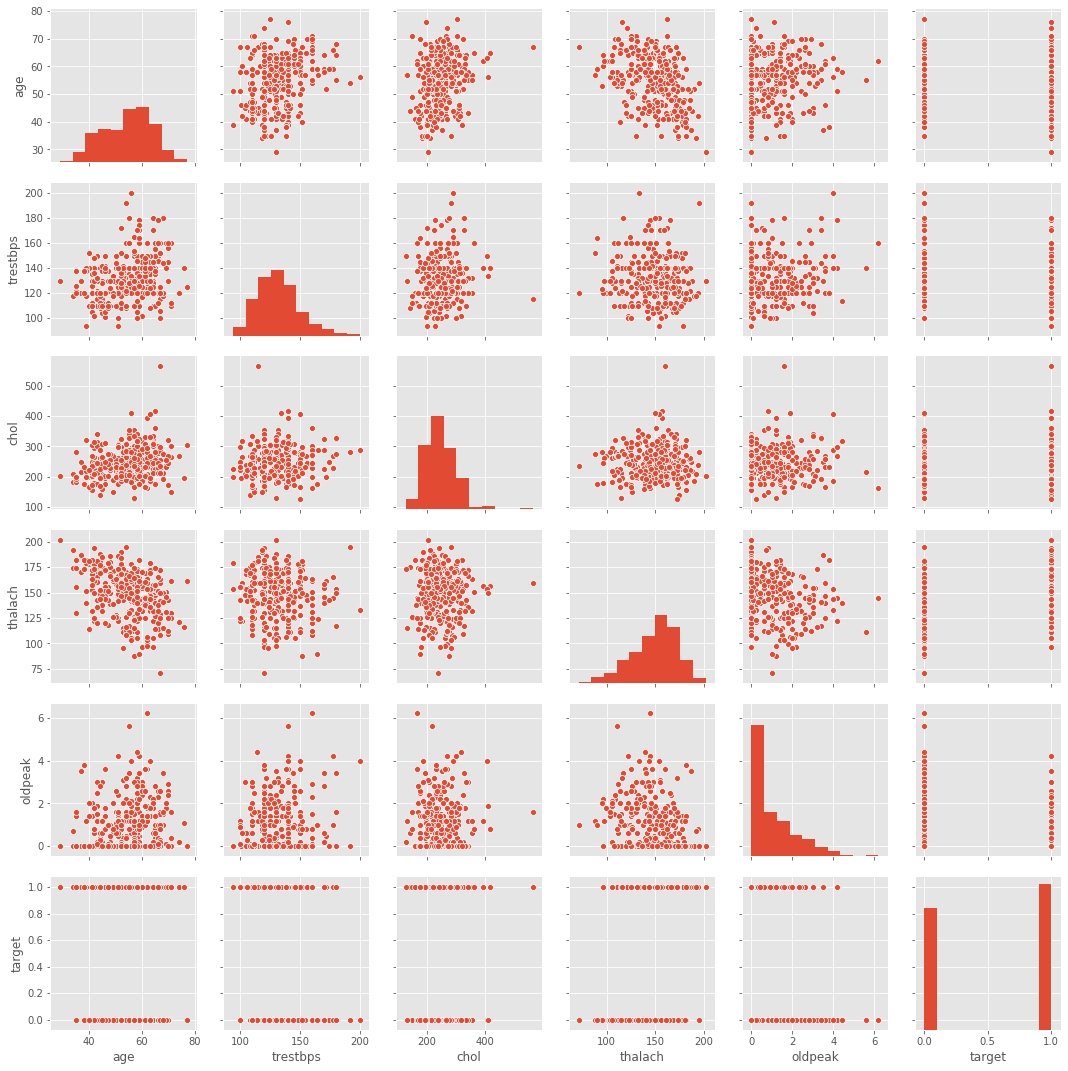

In [18]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(dt[num_var], kind='scatter', diag_kind='hist')
plt.show()

# 4. Classification

### Split the data

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Linear Discriminant Analysis (LDA)

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_score = lda.score(X_test, y_test)
print(lda_score)

0.8021978021978022


### Quadratic Discriminant Analysis (QDA)

In [9]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_score = qda.score(X_test, y_test)
print(qda_score)

0.7912087912087912


### Naive Bayes

In [54]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test, y_test)
print(nb_score)

0.8351648351648352


# 5. Conclusion

This dataset provided data for different paramteres concerning heart desease. Despite the fact that this dataset is old and small by today's standards it provided enough information to create a simple model and then use 3 machine learning techniques to gain more details.

At the start, the premise might have been that factors such as cholesterol and age would be major factors in the model. This dataset didn't show that completely. Instead, the number of major factors and aspects of ECG results dominated.

In my opinion this sort of approach and using ML will become increasingly important as Data Science and Machine Learning continue to gain bigger role in health care.

# 6. Credits

_Author:_ Andrej Angelovski 161529

_Subject:_ Machine Learning

Computer Science and Engineering - FINKI - UKIM